In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

(1088, 1200, 3)

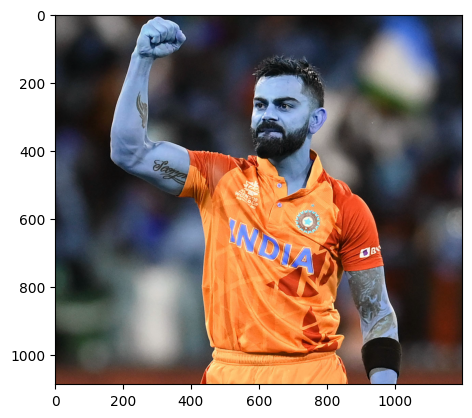

In [2]:
img = cv2.imread("test_images/17kohli1.jpg")
plt.imshow(img)
img.shape

In [3]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(1088, 1200)

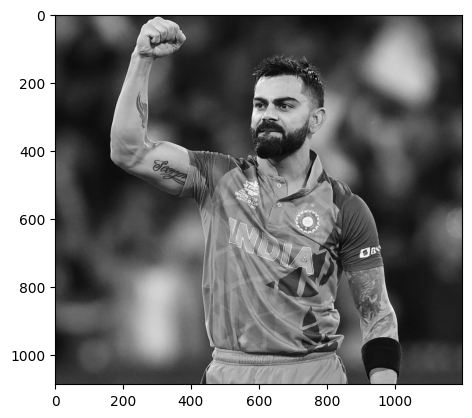

In [4]:
plt.imshow(gray , cmap='gray')

In [5]:
face_cascades = cv2.CascadeClassifier("OpenCV/haarcascades/haarcascade_frontalface_default.xml")
eye_cascades = cv2.CascadeClassifier("OpenCV/haarcascades/haarcascade_eye.xml")

faces = face_cascades.detectMultiScale(gray , 1.3 , 5)
faces

array([[538, 189, 199, 199]])

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(538, 189, 199, 199)

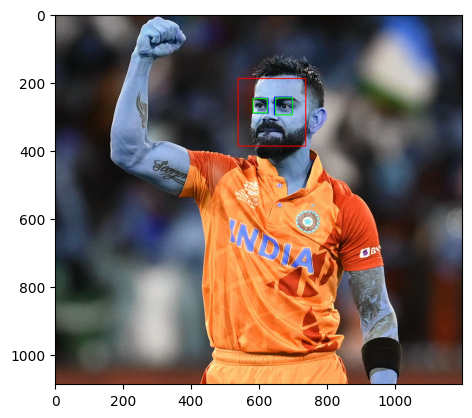

In [14]:
face_img = cv2.rectangle(img , (x,y) , (x+w , y+h) ,(255,0,0) , 2)
plt.imshow(face_img)

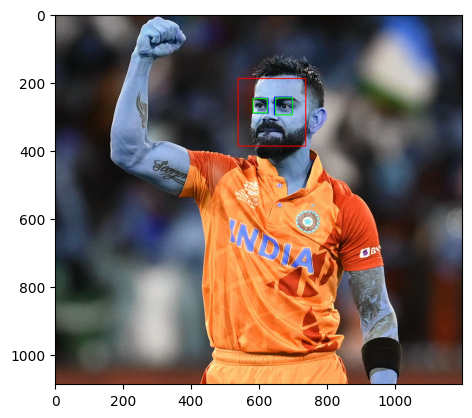

In [15]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img , (x,y) , (x+w,y+h) , (255,0,0) , 2)
    roi_gray = gray[y:y+h  , x:x+w]
    roi_color = face_img[y:y+h , x:x+w]
    eyes = eye_cascades.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color , (ex,ey) , (ex+ew , ey+eh) , (0,255,0),2)

plt.figure()
plt.imshow(face_img , cmap="gray")
plt.show()

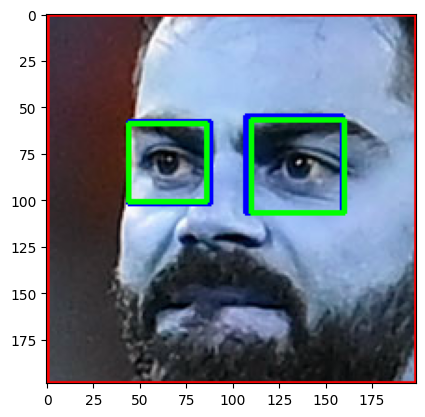

In [16]:
%matplotlib inline
plt.imshow(roi_color , cmap="gray")

In [17]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascades.detectMultiScale(gray , 1.3 , 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascades.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

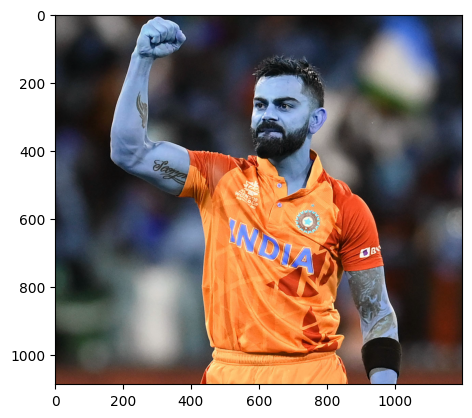

In [18]:
original_image = cv2.imread("test_images/17kohli1.jpg")
plt.imshow(original_image)

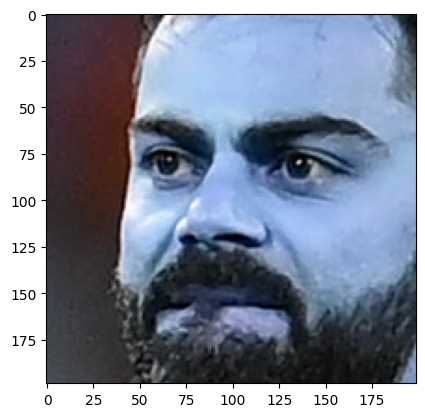

In [20]:
cropped_image = get_cropped_image("test_images/17kohli1.jpg")
plt.imshow(cropped_image)

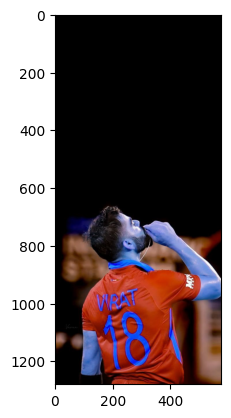

In [21]:
original_distorted_image = cv2.imread("test_images/d9075abe33e84c90df63f2dd692a5f9e.jpg")
plt.imshow(original_distorted_image)

TypeError: Image data of dtype object cannot be converted to float

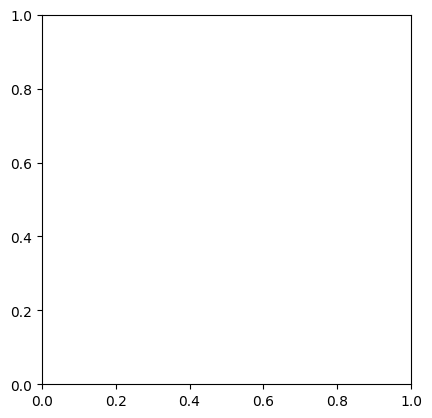

In [24]:
cropped_distorted_image = get_cropped_image("./test_images/d9075abe33e84c90df63f2dd692a5f9e.jpg")
plt.imshow(cropped_distorted_image)

In [25]:
data_path = "./Datasets/"
cr_data_path = "./Datasets/cropped/"

In [26]:
import os
image_dir = []
for i in os.scandir(data_path):
    if i.is_dir():
        image_dir.append(i.path)

In [27]:
image_dir

['./Datasets/mithali_raj',
 './Datasets/ms_dhoni',
 './Datasets/Sir_Kalam',
 './Datasets/Virat_kohli']

In [28]:
import shutil

In [29]:
if os.path.exists(cr_data_path):
    shutil.rmtree(cr_data_path)
os.mkdir(cr_data_path)